## ESMA 3016
## Lab8: Regresion y Correlacion Lineal
### Edgar Acuna

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as sm
%matplotlib inline

In [73]:
ventas=[9,12,16,19,23,27,34,37,40,45]
years=[3,4,6,7,8,12,15,20,22,26]

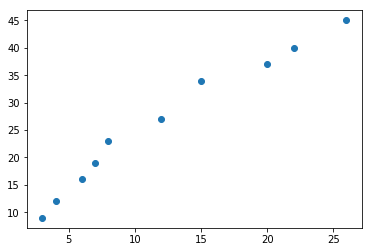

In [74]:
#Haciendo el scatterplot
plt.scatter(years,ventas)

In [75]:
#Hallando la correlacion
np.corrcoef(years,ventas)[0][1]

0.98359288936594169

In [76]:
#Leyendo el archivo de datos corrs directamente desde la internet
cor1=pd.read_table("http://academic.uprm.edu/eacuna/corrs.dat",sep="\s+")
cor1.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,4,8,4,48,4,38,4,48
1,5,12,5,43,5,25,5,32
2,8,15,7,37,8,35,8,25
3,16,27,12,28,12,29,12,17
4,17,33,14,21,17,33,15,23


In [77]:
#Hallando las correlaciones usando pandas
co1=cor1.corr()['x1']['y1']
print "El coeficiente de correlacion entre X1 y Y1 es=", co1
co2=cor1.corr()['x2']['y2']
print "El coeficiente de correlacion entre X2 y Y2 es=",co2
co3=cor1.corr()["x3"]["y3"]
print "El coeficiente de correlacion entre X3 y Y3 es=",co3
co4=cor1.corr()["x4"]["y4"]
print "el coeficiente de correlacion entre X4 y Y4 es=", co4

El coeficiente de correlacion entre X1 y Y1 es= 0.98821206506
El coeficiente de correlacion entre X2 y Y2 es= -0.992433402716
El coeficiente de correlacion entre X3 y Y3 es= 0.19182589496
el coeficiente de correlacion entre X4 y Y4 es= 0.11212638968


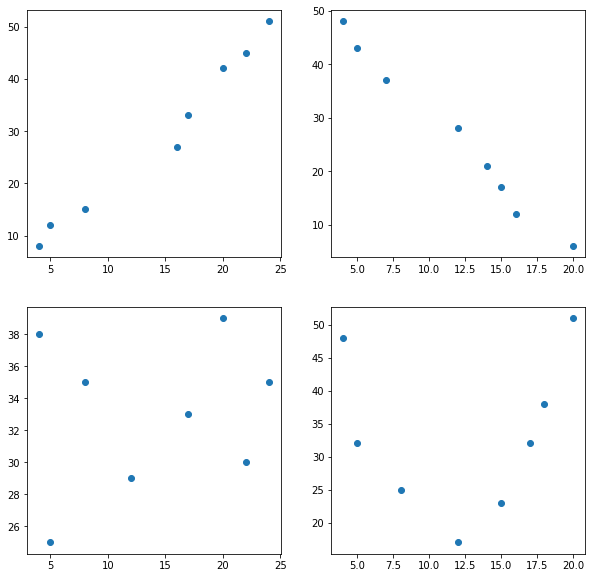

In [78]:
#Ploteando los scatter plots
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
ax1.scatter(cor1['x1'],cor1['y1'])

ax2 = fig.add_subplot(222)
ax2.scatter(cor1['x2'],cor1['y2'])
ax3 = fig.add_subplot(223)
ax3.scatter(cor1['x3'],cor1['y3'])

ax4 = fig.add_subplot(224)
ax4.scatter(cor1['x4'],cor1['y4'])

plt.show()

In [79]:
#Leyendo el archvo de datos corrout
cor2=pd.read_table("http://academic.uprm.edu/eacuna/corrout.dat",sep="\s+")
cor2.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,4,8,4,18,4,8,4,8
1,5,13,5,13,5,12,5,12
2,7,22,7,12,8,15,8,95
3,9,28,9,8,12,20,12,12
4,12,32,12,18,56,27,16,27


In [80]:
#Hallando las correlaciones usando pandas
co1=cor2.corr()['x1']['y1']
print "El coeficiente de correlacion entre X1 y Y1 es=", co1
co2=cor2.corr()['x2']['y2']
print "El coeficiente de correlacion entre X2 y Y2 es=",co2
co3=cor2.corr()["x3"]["y3"]
print "El coeficiente de correlacion entre X3 y Y3 es=",co3
co4=cor2.corr()["x4"]["y4"]
print "el coeficiente de correlacion entre X4 y Y4 es=", co4

El coeficiente de correlacion entre X1 y Y1 es= 0.984271959304
El coeficiente de correlacion entre X2 y Y2 es= 0.995333604545
El coeficiente de correlacion entre X3 y Y3 es= 0.436205866324
el coeficiente de correlacion entre X4 y Y4 es= 0.264237062252


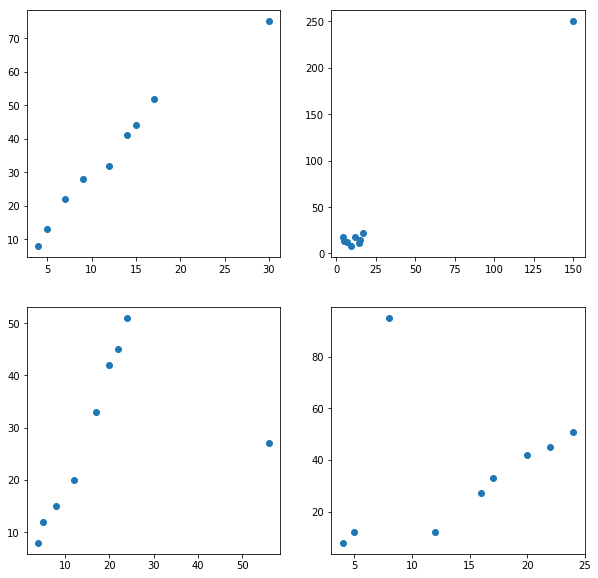

In [81]:
#Ploteando los scatter plots
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
ax1.scatter(cor2['x1'],cor2['y1'])

ax2 = fig.add_subplot(222)
ax2.scatter(cor2['x2'],cor2['y2'])
ax3 = fig.add_subplot(223)
ax3.scatter(cor2['x3'],cor2['y3'])

ax4 = fig.add_subplot(224)
ax4.scatter(cor2['x4'],cor2['y4'])

plt.show()

In [82]:
 #Hallando los coeficentes de la linea de regresion
b, a=np.poly1d(np.polyfit(years, ventas, 1))
print "El slope es:", b, "El intercepto es:", a

El slope es: 1.50720216912 El intercepto es: 7.66141331978


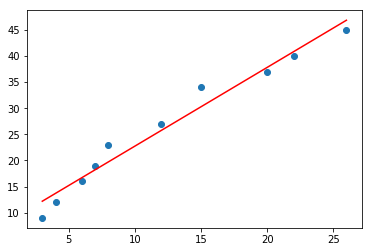

In [83]:
#Trazando la linea de regresion sobre el plot de puntos
x=years
y=ventas
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

In [84]:
#Preprando el dataframe para usar pandas
data=[years,ventas]
data=np.transpose(data)
df=pd.DataFrame(data,columns=['years','ventas'])
df

,years,ventas
0,3,9
1,4,12
2,6,16
3,7,19
4,8,23
5,12,27
6,15,34
7,20,37
8,22,40
9,26,45


In [85]:
#usando pandas para hallar la correlacion
df.corr()["years"]["ventas"]

0.9835928893659418

In [86]:
#usando stats de scipy muestra la correlacion y su p-value
stats.pearsonr(years,ventas)

(0.98359288936594191, 3.1083509793944461e-07)

In [87]:
import statsmodels.formula.api as sm
result = sm.ols(formula="ventas ~ years", data=df).fit()
print result.params

Intercept    7.661413
years        1.507202
dtype: float64


In [88]:
df=pd.read_table("http://academic.uprm.edu/eacuna/eje1reg.txt",delim_whitespace=True)
df.corr()["CEEB"]["GPA"]

0.34803529733952582

In [89]:
result = sm.ols(formula="GPA ~ CEEB", data=df).fit()
print result.params

Intercept    2.209878
CEEB         0.001087
dtype: float64


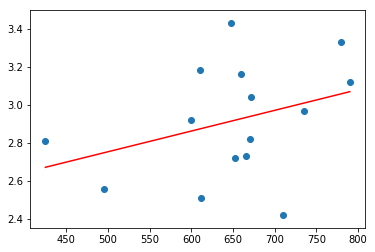

In [90]:
x=df['CEEB']
y=df['GPA']
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()